# Problem Statement

Sistem penyewaan sepeda telah menjadi alternatif transportasi yang semakin populer di kota-kota besar. Namun, permintaan terhadap sepeda sangat fluktuatif dan dipengaruhi oleh berbagai faktor seperti cuaca, musim, serta hari kerja atau hari libur. Ketidakpastian ini menyulitkan operator dalam mengelola ketersediaan sepeda dan merencanakan strategi distribusi yang efisien. Dengan adanya data historis dan informasi lingkungan yang terus dikumpulkan, muncul peluang untuk membangun sistem prediktif yang dapat membantu pengambilan keputusan secara lebih akurat dan berbasis data.

Berdasarkan konteks tersebut, proyek ini berfokus pada dua pertanyaan utama:

- Bagaimana cara membangun model yang dapat memprediksi jumlah penyewaan sepeda secara akurat berdasarkan faktor-faktor seperti cuaca, musim, dan hari kerja?
- Apa saja faktor utama yang paling memengaruhi jumlah penyewaan sepeda, dan bagaimana cara mengoptimalkan model prediktif untuk menangkap hubungan tersebut secara tepat?

# Data Load

In [1]:
# Import library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# load dataset
url = 'https://raw.githubusercontent.com/Sopyaan/Predictive-Analytic-untuk-Penyewaan-Sepeda/refs/heads/main/Dataset/hour.csv'
bike_hour = pd.read_csv(url)
bike_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


# Exploratory Data Analyisis

## Melihat bentuk data

In [3]:
bike_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dtype 'Date' dari 'Object' harus di ubah kedalam 'Datetime'

In [4]:
bike_hour['dteday'] = pd.to_datetime(bike_hour['dteday'])

In [5]:
bike_hour.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


## Melihat missing value

In [6]:
bike_hour.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


## Melihat duplikasi

In [7]:
bike_hour.duplicated().sum()

np.int64(0)

## Melihat outliers

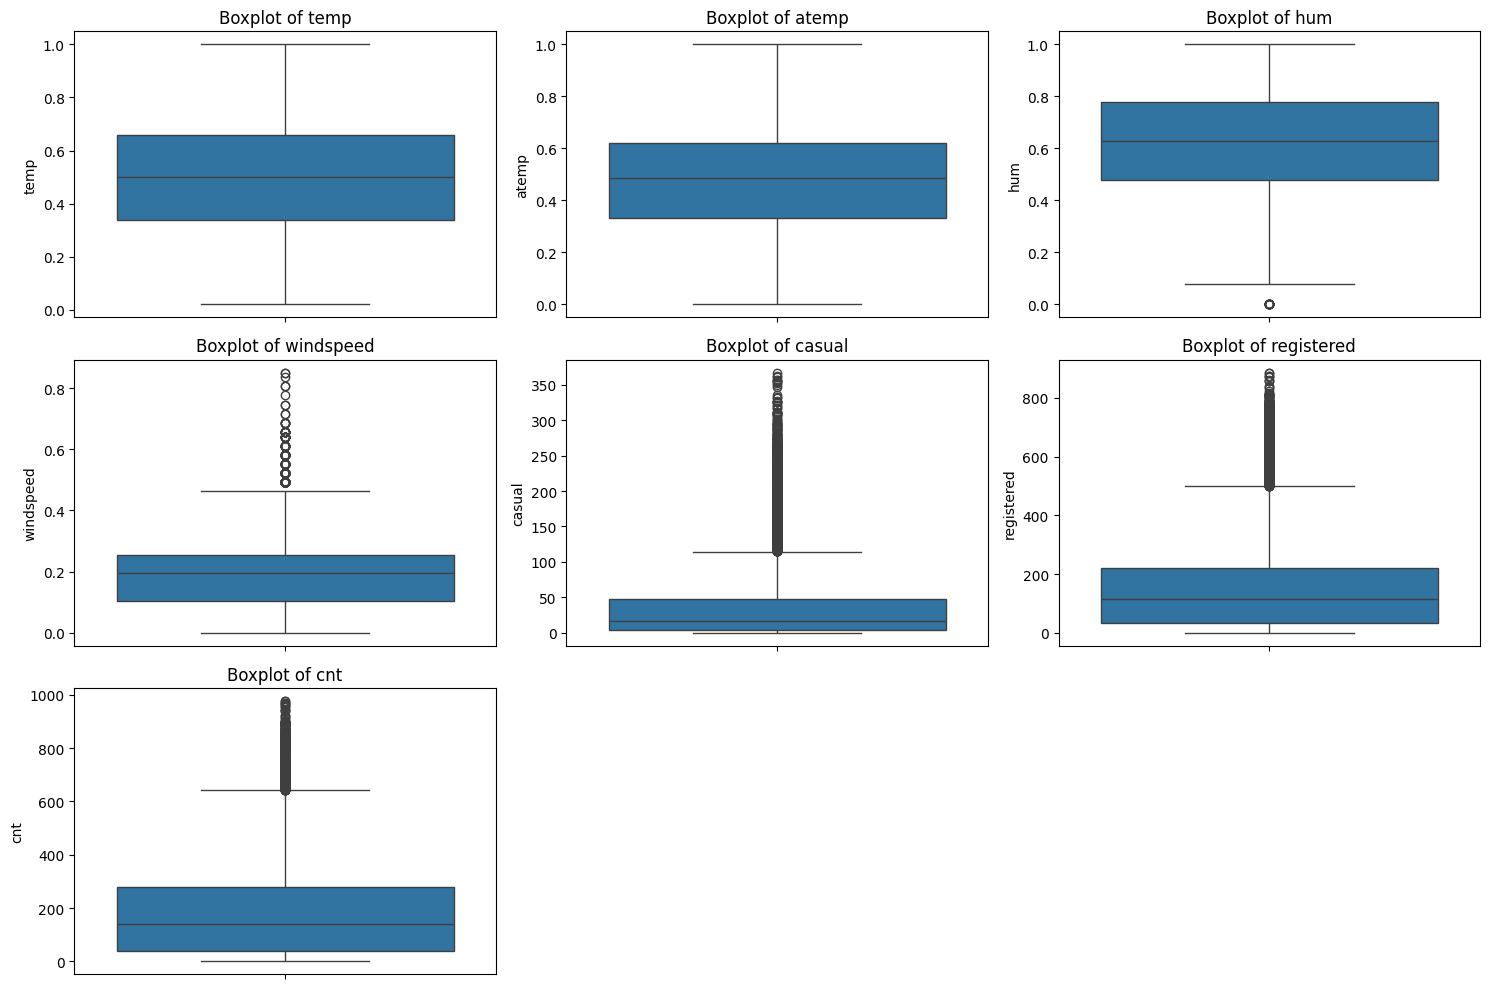

In [8]:
numerical_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Buat boxplot untuk tiap kolom numerik
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=bike_hour, y=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [9]:
# Fungsi untuk mendeteksi outlier menggunakan metode IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers


# Cek outlier untuk semua kolom numerik
for col in numerical_cols:
    outliers = detect_outliers_iqr(bike_hour, col)
    print(f"{col}: {len(outliers)} outliers")

temp: 0 outliers
atemp: 0 outliers
hum: 22 outliers
windspeed: 342 outliers
casual: 1192 outliers
registered: 680 outliers
cnt: 505 outliers


Berdasarkan analisis statistik dan visualisasi boxplot, beberapa fitur seperti windspeed, casual, registered, dan cnt menunjukkan adanya outlier.
Namun, setelah ditinjau, nilai-nilai ini merepresentasikan variasi alami dalam perilaku pengguna sepeda (misalnya lonjakan saat weekend, cuaca bagus, atau musim tertentu). Oleh karena itu, outlier tidak dihapus, karena masih relevan dan berpotensi memberi informasi penting dalam proses pemodelan.

## Data vizualisasi

### Boxplot

<Axes: xlabel='cnt', ylabel='Count'>

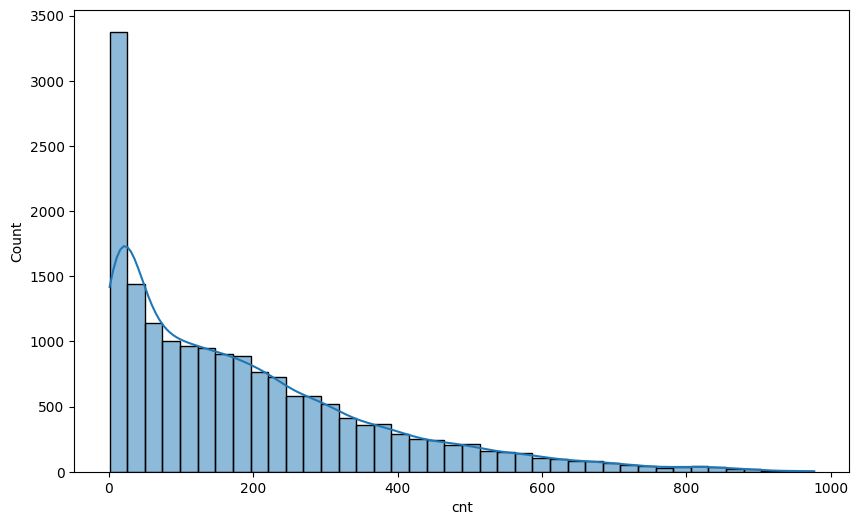

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(data=bike_hour, x='cnt', bins=40, kde=True)

### Heatmap

<Axes: >

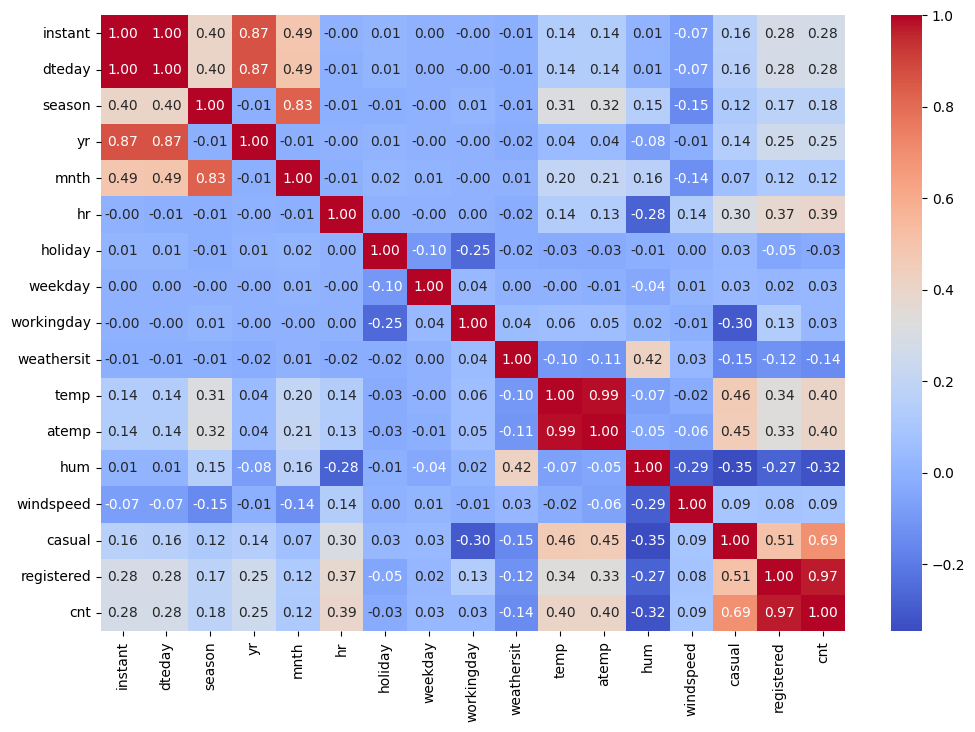

In [11]:
plt.figure(figsize=(12,8))
corr_matrix = bike_hour.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Data preparation

Berdasarkan hasil eksplorasi data, diketahui bahwa dataset tidak mengandung nilai yang hilang (missing values) maupun data duplikat. Oleh karena itu, tahap data preparation tidak memerlukan proses imputasi maupun penghapusan data duplikat.

## Pemisahan Fitur dan Target

In [12]:
# Fitur dan target
X = bike_hour[['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
             'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
y = bike_hour['cnt']

## Split data jadi train-test

In [13]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling

In [14]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['RandomForest', 'Boosting', 'Linear Regression', 'KNN'])

## Random forest

In [15]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

## Gradient Boosting

In [16]:
from sklearn.ensemble import GradientBoostingRegressor

Boosting = GradientBoostingRegressor(n_estimators=100, learning_rate=0.3, max_depth=3, random_state=55)
Boosting.fit(X_train, y_train)

models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=Boosting.predict(X_train), y_true=y_train)

## Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

## KNN

In [18]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

# Evaluasi Model

In [19]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['RF','lin_reg','Boosting', 'KNN'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'RF': RF, 'Boosting': Boosting, 'lin_reg': lin_reg, 'KNN': knn}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
RF,0.387418,1.826605
lin_reg,20.292648,19.379828
Boosting,2.855377,2.873663
KNN,2.476507,2.94946


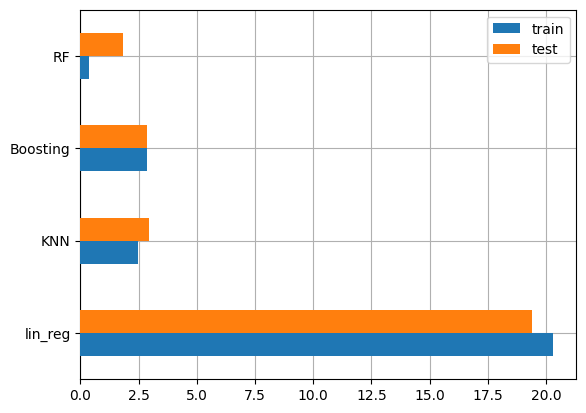

In [20]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [21]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_RF,prediksi_Boosting,prediksi_lin_reg,prediksi_KNN
12830,425,375.5,450.5,450.3,370.6


# Kesimpulan

Penjelasan:
- Random Forest memiliki performa terbaik dengan error terkecil pada train (0.39) maupun test (1.83), menunjukkan model ini sangat baik dalam menangkap pola dari data tanpa overfitting yang parah.
- Boosting dan KNN juga menunjukkan performa cukup baik, namun masih kalah dari Random Forest dalam hal akurasi prediksi.
- Linear Regression memiliki error tertinggi, yang menunjukkan bahwa hubungan antar fitur mungkin tidak linear atau model terlalu sederhana untuk data ini.

Berdasarkan hasil evaluasi, Random Forest menjadi model paling andal dengan prediksi mendekati nilai aktual dan error terkecil di antara semua model yang diuji. Oleh karena itu, Random Forest dipilih sebagai model terbaik untuk implementasi akhir dalam proses prediksi.

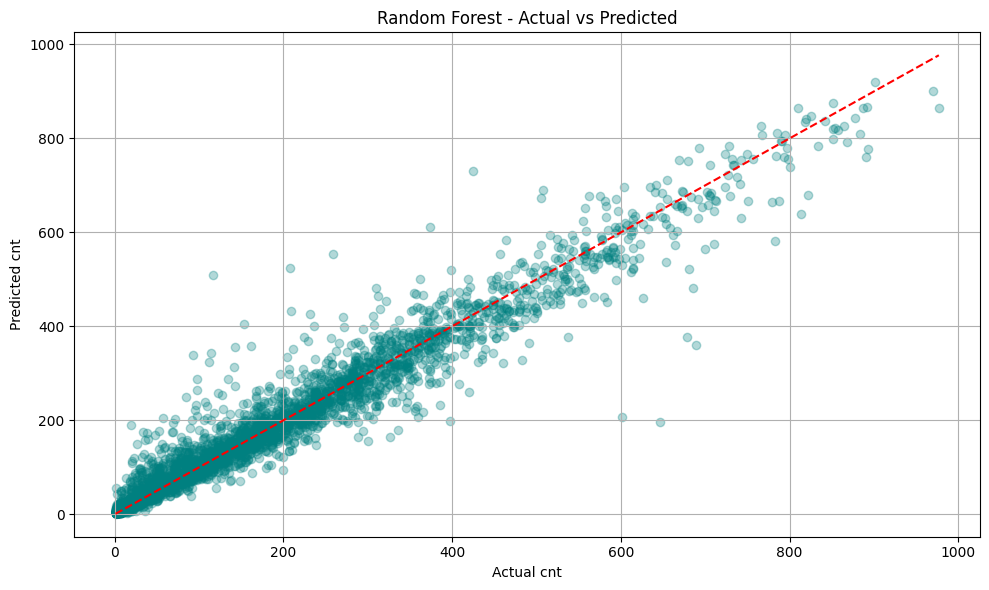

In [61]:
# Ambil model terbaik untuk visualisasi
best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_best, alpha=0.3, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual cnt')
plt.ylabel('Predicted cnt')
plt.title('Random Forest - Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()